# CREATE MODEL USING LARGE AMOUNT OF CAREER FEATURES IGNORING ERA (essentially a baseline)

In [1]:
# read in many features that focus on career totals and that ignore era availability of statistics 
import pickle

pickling_off = open("statsHOF.pickle","rb")
stats_complete_agg = pickle.load(pickling_off)


features = stats_complete_agg.iloc[: , [1,4,5,7,8,9,10,13,14,15,16,18,19,20,21,23,50,51,52,53,
54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81, 88]]

In [2]:
features.head()

,G_Player,OWS,DWS,FG_Player,FGA_Player,3P_Player,3PA_Player,FT_Player,FTA_Player,ORB_Player,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,FT%,2P%,3P%,season_mvp_count
0,1196.0,56.6,37.8,4371.0,8815.0,123.0,485.0,3053.0,4155.0,3194.0,...,14.816657,5.436476,1.204850,0.981300,11.485172,15.084390,73.477738,50.996399,25.360825,0
1,151.0,-0.4,1.4,617.0,1418.0,9.0,65.0,259.0,333.0,140.0,...,5.545521,15.793957,0.754804,0.461184,11.485019,23.853319,77.777778,44.937177,13.846154,0
2,80.0,0.3,-0.1,166.0,440.0,73.0,193.0,37.0,45.0,22.0,...,3.651194,19.999325,0.713761,0.685616,11.881947,18.827356,82.222222,37.651822,37.823834,0
3,22.0,-0.2,0.2,17.0,42.0,5.0,10.0,9.0,20.0,8.0,...,12.824274,3.798988,0.281701,7.165778,16.447368,17.589763,45.000000,37.500000,50.000000,0
4,261.0,1.1,3.5,549.0,1444.0,218.0,690.0,207.0,279.0,68.0,...,5.318603,22.994422,1.400309,0.175337,12.752261,20.329538,74.193548,43.899204,31.594203,0


In [3]:
# set our target to the hall of fame binary classifier 

target = stats_complete_agg.iloc[: , 89]

In [4]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: HOF, dtype: int64

In [5]:
# import the scikit learn libraries that we will use to train our first two models 
# (hopefully Guido van Rossum can forgive me for using imports somewhat 
# sporatically in this file)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

In [6]:
# scale our features so as not to skew the classification with some large and some small values 

scaled_features = scale(features)

In [7]:
# get rid of nans and print out a preview of our scaled features 

scaled_features = np.nan_to_num(scaled_features)

In [8]:
scaled_features

array([[ 2.43984149,  2.52399261,  2.24829455, ...,  0.74847502,
         0.58351842, -0.08426781],
       [-0.47500376, -0.45827981, -0.49786939, ...,  0.1868845 ,
        -0.09235073, -0.08426781],
       [-0.67304588, -0.42165541, -0.61103549, ..., -0.48834844,
         1.31505158, -0.08426781],
       ...,
       [-0.85156272, -0.44258363, -0.60349108, ...,  0.65612521,
         0.3527095 , -0.08426781],
       [-0.48337174, -0.46874392, -0.44505855, ...,  0.16422899,
         0.79162194, -0.08426781],
       [ 1.45520956,  1.33108364,  1.86352982, ...,  0.44938416,
         0.91451742, -0.08426781]])

In [9]:
# create our model, divide data into training and testing sets using a seed for reproduceability, and fit the model to our data 

logreg = LogisticRegression()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state=20)

In [11]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# check our models score, and append the probabilities of each player to our dataframe for later analysis 

logreg.score(X_test, y_test)

0.979002624671916

In [13]:
predictions = logreg.predict_proba(scaled_features)

In [14]:
predictions = predictions[:,1]

In [15]:
predictions = pd.DataFrame(predictions)

In [16]:
stats_complete_hof = stats_complete_agg.join(predictions)

In [17]:
stats_complete_hof = stats_complete_hof.rename(columns = {0 : 'HOF_Prob'})

In [18]:
# continue to use list of leading scorers as quick check for our dataframe updates 

stats_complete_hof.sort_values('PTS_Player', ascending = False).head(50)

,Player,G_Player,GS,MP_Player,OWS,DWS,WS,FG_Player,FGA_Player,3P_Player,...,3P%,EFG%,PPG_career,RPG_career,APG_career,WS_per_season,MVP_league,season_mvp_count,HOF,HOF_Prob
2107,Kareem Abdul-Jabbar,2109.0,625.0,80779.0,266.5,138.8,405.0,22653.0,40822.0,1.0,...,5.555556,55.493361,26.018492,12.320531,3.831674,20.250000,NBA,6,1,1.000000
1213,Elvin Hayes,1955.0,129.0,77843.0,55.3,137.6,192.8,17390.0,38790.0,5.0,...,14.705882,44.837587,22.114066,13.376982,1.916113,12.050000,NaN,0,1,0.995082
1963,John Havlicek,1992.0,0.0,75499.0,101.6,119.2,221.0,16993.0,38452.0,0.0,...,0.000000,44.192760,21.534137,6.532129,5.218876,13.812500,NaN,0,1,1.000000
3769,Wilt Chamberlain,1466.0,0.0,66510.0,200.7,130.9,331.2,15860.0,28776.0,0.0,...,0.000000,55.115374,26.873124,22.100955,4.642565,23.657143,NBA,4,1,0.999975
2802,Oscar Robertson,1541.0,0.0,63775.0,204.5,56.2,260.7,13266.0,27394.0,0.0,...,0.000000,48.426663,24.016872,6.841661,9.088903,18.621429,NBA,1,1,0.999997
1816,Jerry West,1364.0,0.0,53235.0,179.8,57.7,238.1,13120.0,27488.0,0.0,...,0.000000,47.729919,26.739003,5.360704,7.140762,17.007143,NaN,0,1,0.999936
2109,Karl Malone,1394.0,1389.0,51905.0,131.6,88.1,219.3,12776.0,24734.0,83.0,...,27.483444,51.821379,24.987805,10.178623,3.546628,12.183333,NBA,2,1,0.939098
1324,Gail Goodrich,1738.0,0.0,58974.0,101.4,36.8,138.4,13269.0,29116.0,0.0,...,0.000000,45.572881,19.743383,3.311853,4.878021,9.885714,NaN,0,1,0.984723
857,Dave Bing,1578.0,0.0,59004.0,84.4,41.5,125.6,12567.0,28479.0,0.0,...,0.000000,44.127252,21.094423,3.882129,6.266793,10.466667,NaN,0,1,0.994244
2594,Michael Jordan,1072.0,1039.0,41011.0,149.9,64.2,213.9,12192.0,24537.0,581.0,...,32.677165,50.872152,30.123134,6.223881,5.254664,14.260000,NBA,5,1,0.787057


In [19]:
# zip our column names to our coefficient values and print them out so they can be analyzed and interpreted 

cos = [*zip((np.array(features.columns)), (logreg.coef_).reshape(-1,1))]

In [20]:
cos

[('G_Player', array([-0.97709209])),
 ('OWS', array([0.08906778])),
 ('DWS', array([0.15205161])),
 ('FG_Player', array([0.32130753])),
 ('FGA_Player', array([0.17256191])),
 ('3P_Player', array([0.12594082])),
 ('3PA_Player', array([-0.38736675])),
 ('FT_Player', array([0.10890467])),
 ('FTA_Player', array([0.11042378])),
 ('ORB_Player', array([1.06912547])),
 ('DRB_Player', array([-1.43580497])),
 ('AST_Player', array([0.89423135])),
 ('STL_Player', array([0.26965231])),
 ('BLK_Player', array([0.15515809])),
 ('TOV_Player', array([0.03759789])),
 ('PTS_Player', array([0.27768147])),
 ('Championships', array([0.4308867])),
 ('Runner-Ups', array([0.09685966])),
 ('ROY', array([0.11285345])),
 ('6Man', array([0.])),
 ('1st Team All NBA', array([0.09520924])),
 ('2nd Team All NBA', array([0.15738362])),
 ('3rd Team All NBA', array([-0.04476836])),
 ('Finals MVPs', array([-0.07098824])),
 ('Playoff Leading PTS', array([0.])),
 ('Playoff Leading RBS', array([-0.18581925])),
 ('Playoff Lead

#### Now I'll go through a quick examination of the above results, 
#### some things that jump out right away are the large size of the model score and how close it is to 1.
#### However in our case, this number is very misleading. The number of non hall of famers is so large 
#### and so many players are rather obviously not HOF candidates based on their careers,
#### so even with a very poor score on fringe players and actual hall of famers, a model can produce a very 
#### large score in this case. What we are almost more concerned with here are the actual probabilities 
#### produced by our model. Without going into too much detail at this time, right of the bat there
#### are some pretty large discrepancies when applying some domain and previous player knowledge.
#### Lastly, some notes on the coefficiants produced, there is a lot of multicollinearity at this 
#### point (it's just a baseline so it's okay) and also stats such as ABA finals MVP are weighed much more 
#### heavily than NBA finals MVPs (which are basically negligable right now) which seems rather off,
#### showing that era adjustment as well as removing correlated features can greatly improve our 
#### model's performance 

# CREATE MODEL USING CAREER AVERAGES, REMOVING ERA SPECIFIC FACTORS

In [22]:
# create second scikit learn model using similar methods, only this time we will use career averages rather than career totals
# along with removing stats that are specific to certain eras 

Era_Free_Features = stats_complete_agg.iloc[: , [50, 51, 52, 53, 54, 55, 56, 62,
                                                 63, 64, 65, 66, 67, 68, 82, 83, 84, 85, 86, 88]]

Era_Free_Features = Era_Free_Features.fillna(0)

Era_Free_Features.head()

,Championships,Runner-Ups,ROY,6Man,1st Team All NBA,2nd Team All NBA,3rd Team All NBA,AllStarSelections,dpoy_count,mip_count,abafinmvp_count,all_star_mvp_count,Seasons_Played,PER,EFG%,PPG_career,RPG_career,APG_career,WS_per_season,season_mvp_count
0,2,2,0,0,0,0,0,0,0,0,0,0,15,14.131250,50.283607,9.964883,7.514214,1.103679,6.293333,0
1,0,0,0,0,0,0,0,0,0,0,0,0,2,11.550000,43.829337,9.947020,2.086093,2.119205,0.550000,0
2,0,0,0,0,0,0,0,0,0,0,0,0,3,4.366667,46.022727,5.525000,1.000000,1.837500,0.100000,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,8.400000,46.428571,2.181818,1.636364,0.181818,0.000000,0
4,0,1,0,0,0,0,0,0,0,0,0,0,6,10.187500,45.567867,5.835249,1.444444,2.172414,0.783333,0


In [23]:
Era_Free_Targets = stats_complete_agg.iloc[:, 89]

Era_Free_Targets = Era_Free_Targets.fillna(0)

Era_Free_Targets.head()

0    0
1    0
2    0
3    0
4    0
Name: HOF, dtype: int64

In [24]:
# Play around with hyperparameters for this second model, seeing if regularization will have a big impact on our model's results
# K fold validation also included this time around as additional validation precaution 

from sklearn.model_selection import GridSearchCV

In [25]:
logreg_era_free = LogisticRegression()

In [26]:
era_free_features_scaled = scale(Era_Free_Features)

In [27]:
X_era_train, X_era_test, y_era_train, y_era_test = train_test_split(era_free_features_scaled, Era_Free_Targets, test_size = .2, random_state = 20)

In [28]:
tester = GridSearchCV(logreg_era_free, param_grid = {'C' : [0.001, 0.1 , 1]}, cv = 5)

In [29]:
tester.fit(X_era_train, y_era_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.001, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
# Find that 0.1 is actually our model's best parameter, not the default value of 1

tester.best_params_

{'C': 0.1}

In [31]:
tester.score(X_era_test, y_era_test)

0.979002624671916

In [32]:
# we see a slight increase in model accuracy, which given the small sample size of 
# actual inductees that we're dealing with and mentioned before, this is actually 
# a substantial increase (we will adress the actual sensitivity and specificity later)

tester.score(era_free_features_scaled, Era_Free_Targets)

0.9824008405568689

In [33]:
era_free_predicts = tester.predict_proba(era_free_features_scaled)

In [34]:
era_free_predicts = pd.DataFrame(era_free_predicts[:, 1])

In [35]:
stats_complete_hof = stats_complete_hof.join(era_free_predicts)
stats_complete_hof = stats_complete_hof.rename(columns = {0 : 'era_free_hof_prob'})

# CREATE MODEL USING ERA FREE CRITERIA IN KERAS

In [36]:
# import all keras libraries that we'll use to create the deep learning version of our classifier 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [37]:
# set a random seed for reproduceability 

np.random.seed(20)

# create model 
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(20,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# compile our model using binary crossentropy as our loss function and adam as our optimizer 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Save model to disk 
# Save model structure as json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

In [39]:
# save our weight checkpoints to disk as well so that they can later be used

filepath = 'weights.best.hdh5'
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

# save our model history to a variable for later analysis 

history=model.fit(era_free_features_scaled,Era_Free_Targets,validation_split=0.333,epochs=250,verbose=0,callbacks=callbacks_list)

/usr/local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


In [40]:
# Evaluate the model
scores = model.evaluate(era_free_features_scaled, Era_Free_Targets)
Y_predict = model.predict(era_free_features_scaled)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# create confusion matrix and variable of prediction values to later be appended to our dataframe 
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Era_Free_Targets, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

3807/3807 [==============================] - 0s 12us/step

accuracy: 98.37%
Confusion Matrix
True negatives:  3651
False negatives:  33
False positives:  29
True positives:  94


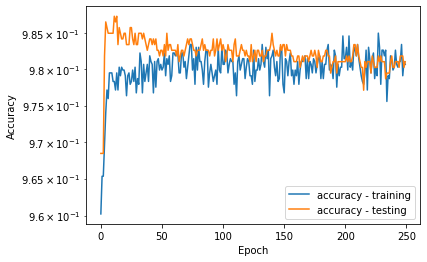

In [47]:
# create plot to analyze the progression of our training and testing loss throughout our epochs of training 

import matplotlib.pyplot as plt
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
# append probability values to our dataframe and once again examine list of leading scorers 

df_Y_predict = pd.DataFrame(Y_predict)
stats_complete_hof = stats_complete_hof.join(df_Y_predict)
stats_complete_hof = stats_complete_hof.rename(columns = {0 : 'keras_hof_prob'})

In [44]:
# Keras provided our best model to date and in my opinion, looking through the three probabilty columns,
# our most accurate set of probabilities yet

stats_complete_hof.sort_values('PTS_Player', ascending = False).head(25)

,Player,G_Player,GS,MP_Player,OWS,DWS,WS,FG_Player,FGA_Player,3P_Player,...,PPG_career,RPG_career,APG_career,WS_per_season,MVP_league,season_mvp_count,HOF,HOF_Prob,era_free_hof_prob,keras_hof_prob
2107,Kareem Abdul-Jabbar,2109.0,625.0,80779.0,266.5,138.8,405.0,22653.0,40822.0,1.0,...,26.018492,12.320531,3.831674,20.250000,NBA,6,1,1.000000,0.999024,0.954667
1213,Elvin Hayes,1955.0,129.0,77843.0,55.3,137.6,192.8,17390.0,38790.0,5.0,...,22.114066,13.376982,1.916113,12.050000,NaN,0,1,0.995082,0.995959,0.930223
1963,John Havlicek,1992.0,0.0,75499.0,101.6,119.2,221.0,16993.0,38452.0,0.0,...,21.534137,6.532129,5.218876,13.812500,NaN,0,1,1.000000,0.999978,0.985852
3769,Wilt Chamberlain,1466.0,0.0,66510.0,200.7,130.9,331.2,15860.0,28776.0,0.0,...,26.873124,22.100955,4.642565,23.657143,NBA,4,1,0.999975,0.997193,0.936867
2802,Oscar Robertson,1541.0,0.0,63775.0,204.5,56.2,260.7,13266.0,27394.0,0.0,...,24.016872,6.841661,9.088903,18.621429,NBA,1,1,0.999997,0.988704,0.817299
1816,Jerry West,1364.0,0.0,53235.0,179.8,57.7,238.1,13120.0,27488.0,0.0,...,26.739003,5.360704,7.140762,17.007143,NaN,0,1,0.999936,0.999884,0.935971
2109,Karl Malone,1394.0,1389.0,51905.0,131.6,88.1,219.3,12776.0,24734.0,83.0,...,24.987805,10.178623,3.546628,12.183333,NBA,2,1,0.939098,0.668398,0.679969
1324,Gail Goodrich,1738.0,0.0,58974.0,101.4,36.8,138.4,13269.0,29116.0,0.0,...,19.743383,3.311853,4.878021,9.885714,NaN,0,1,0.984723,0.715670,0.824938
857,Dave Bing,1578.0,0.0,59004.0,84.4,41.5,125.6,12567.0,28479.0,0.0,...,21.094423,3.882129,6.266793,10.466667,NaN,0,1,0.994244,0.730333,0.753453
2594,Michael Jordan,1072.0,1039.0,41011.0,149.9,64.2,213.9,12192.0,24537.0,581.0,...,30.123134,6.223881,5.254664,14.260000,NBA,5,1,0.787057,0.661362,0.674138


In [45]:
# in order to look into our wrong predictions, we look into players not in the hall of fame with a high probability, results explained below 

stats_complete_hof[stats_complete_hof['HOF'] == 0].sort_values('keras_hof_prob', ascending = False).head(50)

,Player,G_Player,GS,MP_Player,OWS,DWS,WS,FG_Player,FGA_Player,3P_Player,...,PPG_career,RPG_career,APG_career,WS_per_season,MVP_league,season_mvp_count,HOF,HOF_Prob,era_free_hof_prob,keras_hof_prob
3572,Tony Parker,1143.0,1130.0,36205.0,64.8,44.3,108.9,7386.0,14979.0,496.0,...,16.204724,2.815398,5.804024,6.806250,NaN,0,0,0.559701,0.749072,0.858473
3481,Tim Duncan,1318.0,1315.0,44493.0,93.3,100.0,193.3,9657.0,19053.0,29.0,...,18.801214,10.753414,3.028073,10.738889,NBA,2,0,0.712971,0.942265,0.842064
610,Chris Bosh,893.0,881.0,31936.0,68.8,37.4,106.0,6209.0,12581.0,305.0,...,19.248600,8.501680,2.010078,8.153846,NaN,0,0,0.693293,0.915888,0.837795
2841,Pau Gasol,1119.0,1081.0,38829.0,86.7,50.4,136.9,7651.0,15008.0,130.0,...,17.873995,9.427167,3.248436,8.556250,NaN,0,0,0.591603,0.534291,0.811665
2291,Larry Foust,745.0,0.0,19926.0,48.4,25.8,74.2,3502.0,8648.0,0.0,...,13.853691,9.959732,1.707383,6.745455,NaN,0,0,0.836310,0.641104,0.805437
2324,LeBron James,1061.0,1060.0,41272.0,143.8,61.6,205.6,10423.0,20803.0,1467.0,...,27.131951,7.263902,7.032045,14.685714,NBA,4,0,0.514025,0.919224,0.779318
3360,Stephen Curry,574.0,568.0,19897.0,61.8,22.2,84.3,4589.0,9645.0,1917.0,...,22.801394,4.358885,6.822300,10.537500,NBA,2,0,0.251069,0.460597,0.776121
640,Chris Paul,834.0,834.0,29646.0,114.8,39.9,154.7,5493.0,11614.0,997.0,...,18.717026,4.417266,9.893285,12.891667,NaN,0,0,0.826360,0.949530,0.750272
1036,Dirk Nowitzki,1312.0,1282.0,45735.0,135.5,57.7,193.2,10173.0,21482.0,1664.0,...,21.970274,7.897104,2.509909,10.733333,NBA,1,0,0.106114,0.841445,0.748737
1130,Dwyane Wade,915.0,904.0,32352.0,73.5,43.8,117.2,7739.0,15975.0,431.0,...,23.297268,4.805464,5.653552,8.371429,NaN,0,0,0.909345,0.916845,0.748148


# 17 FASLE POSITIVES ARE NOT YET ELIGIBLE BUT LIKELY HOFers

# Brings sensitivity up over 93%

In [46]:
# in order to look into our wrong predictions, we look into players in the hall of fame with a low probability, results explained below 

stats_complete_hof[stats_complete_hof['HOF'] == 1].sort_values('keras_hof_prob', ascending = True).head(50)

,Player,G_Player,GS,MP_Player,OWS,DWS,WS,FG_Player,FGA_Player,3P_Player,...,PPG_career,RPG_career,APG_career,WS_per_season,MVP_league,season_mvp_count,HOF,HOF_Prob,era_free_hof_prob,keras_hof_prob
3116,Roger Brown,107.0,0.0,1277.0,-0.2,1.2,1.1,80.0,203.0,0.0,...,1.943925,3.364486,0.345794,0.275000,NaN,0,1,0.966056,0.730211,0.002922
2386,Louie Dampier,232.0,0.0,4431.0,4.9,1.9,6.8,692.0,1418.0,0.0,...,6.693966,1.125000,2.771552,2.266667,NaN,0,1,0.000589,0.002272,0.005212
3586,Tracy McGrady,859.0,669.0,28196.0,57.1,33.4,90.6,6250.0,14395.0,1063.0,...,19.986030,5.558789,4.537835,6.471429,NaN,0,1,0.075509,0.141923,0.012080
212,Arvydas Sabonis,404.0,253.0,9687.0,20.4,19.9,40.0,1780.0,3562.0,129.0,...,12.007426,7.235149,2.094059,6.666667,NaN,0,1,0.001351,0.018314,0.013016
2000,John Thompson,74.0,0.0,771.0,0.2,1.9,2.1,98.0,239.0,0.0,...,3.540541,3.513514,0.256757,1.050000,NaN,0,1,0.006955,0.003204,0.015618
3670,Vlade Divac,1052.0,898.0,31464.0,40.6,48.7,89.1,4821.0,9746.0,93.0,...,11.780418,8.241445,3.134030,5.940000,NaN,0,1,0.021230,0.044013,0.025409
3015,Reggie Miller,1308.0,1223.0,44632.0,132.4,32.0,164.4,7775.0,16458.0,2395.0,...,18.202599,3.014526,3.022936,9.670588,NaN,0,1,0.033071,0.031634,0.037215
659,Chuck Cooper,409.0,0.0,7964.0,2.6,9.1,11.6,933.0,2750.0,0.0,...,6.662592,5.943765,1.794621,1.933333,NaN,0,1,0.012174,0.007266,0.055241
359,Bob Houbregs,158.0,0.0,3595.0,8.2,3.5,11.8,568.0,1359.0,0.0,...,10.392405,5.860759,1.898734,2.950000,NaN,0,1,0.027216,0.010044,0.062870
1906,Joe Fulks,326.0,0.0,4490.0,-11.1,10.5,-0.7,1494.0,4834.0,0.0,...,12.592025,4.230061,1.417178,-0.140000,NaN,0,1,0.026330,0.008135,0.064109


# 11 players were deemed to have circumstances outside the scope of this model:

### Reasonings for each player include :
### Arvydis Sabonis recognized largely due to international successes which are not included in this analysis 
### John Thompson was selected due to coaching successes which are not included in this analysis 
### Roger Brown spent his career in the ABA which this model does not contain enough data on to properly encompass this 
### Mel Daniels was mainly a fixture in the ABA as well
### Lou Dampier was elected mainly for collegiate and ABA accomplishments 
### Joe Fulks played most of his career too early on for this model to recoginze ( pre - 1950's )
### Al Cervi both played too early and spent too much time in the ABA for this model to properly categorize him 
### Maurice Stokes falls under the same umbrella as Al Cervi
### Bill Bradley was enshrined moreso for his collegiate accomplishments than his professional ones 
### Bob Houbregs is in the same category as Bill Bradley 
### KC Jones was just as much recognized for his coaching career as his playing one, outside of this model's scope
### Chuck Cooper made history as the first African-American player to be drafted to the NBA, and while this is an extraordinary accomplishment it falls outside of the model's scope

# Brings our sensitivity up to around 99.5%

In [47]:
# define functions using keras predictions to easily display probabilities or final prediction for any given individual player 

def probCheck(player):
    print(stats_complete_hof[stats_complete_hof['Player'] == player]['keras_hof_prob'].values)

def predictCheck(player):
    if y_pred[stats_complete_hof[stats_complete_hof['Player'] == player].index] == 1:
        print("Yes")
    else:
        print("No")

In [48]:
probCheck('Kevin Garnett')

[0.67502534]


In [49]:
predictCheck('Kevin Garnett')

Yes


In [53]:
probCheck('Bill Walton')

[0.80557334]


In [54]:
predictCheck('Bill Walton')

Yes


In [55]:
probCheck('Bernard King')

[0.3734376]


In [57]:
predictCheck('Bernard King')

No


#### Ultimately while all models were fairly accurate given certain data limitations, Keras performed most effectively
#### scikit learn options could still be valuable given potential time or computing restraints.
#### Also all 3 models undoubtedly have more hyper parameter tuning to be done, but again the time vs benefit 
#### dillema must be considered (also seeing as Keras performed most effectively I did not go back and calculate
#### confusion matrices for other models but could have).
#### After considering all edge cases outside the scope of the model, it performed nearly perfect on accuracy scores.
#### Aside from all of this, the biggest success of this project may be the robust dataframe that is now available for future analyses.